In [41]:
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '210e5c9a-5c98-40f4-8fb6-7ad3666cc289',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [42]:
type(data)

dict

In [46]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [87]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10816,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19627500.00000,19627500.00000,False,NaN,1,NaN,NaN,None,2024-02-14T10:52:00.000Z,51345.94975,40406756030.54626,3.06660,-0.51924,2.85952,19.52647,20.49575,21.68394,37.61542,1007792628788.00671,52.50480,1078264944824.77002,None,2024-02-14T10:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-14 21:52:43.916873
1,1027,Ethereum,ETH,ethereum,8407,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120167306.19819,120167306.19819,True,NaN,2,NaN,NaN,None,2024-02-14T10:52:00.000Z,2759.32236,20452503807.39149,5.40100,0.51514,3.42351,16.83584,8.75780,22.90533,35.21078,331580334872.30994,17.27520,331580334872.31000,None,2024-02-14T10:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-14 21:52:43.916873
2,825,Tether USDt,USDT,tether,74626,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,96668335177.57712,99600626148.96284,True,NaN,3,NaN,NaN,None,2024-02-14T10:51:00.000Z,1.00043,63435058346.41449,2.11960,0.01068,0.00414,0.06294,0.08981,0.11494,-0.00109,96709801086.56693,5.03850,99643349864.97000,None,2024-02-14T10:51:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-14 21:52:43.916873
3,5426,Solana,SOL,solana,625,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,437428960.86406,569542538.78899,True,NaN,4,NaN,NaN,None,2024-02-14T10:52:00.000Z,115.59599,2609378649.29732,-10.62010,-0.52003,1.70990,21.49983,20.72814,55.99808,76.71729,50565034676.50310,2.63440,65836834778.21000,None,2024-02-14T10:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-14 21:52:43.916873
4,1839,BNB,BNB,bnb,2062,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149544973.13218,149544973.13218,False,NaN,5,NaN,NaN,None,2024-02-14T10:51:00.000Z,330.90762,885927722.86971,-11.71100,-0.27208,1.32082,8.82892,5.40956,34.20557,31.25435,49485571540.32784,2.57690,49485571540.33000,None,2024-02-14T10:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-14 21:52:43.916873


In [58]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '210e5c9a-5c98-40f4-8fb6-7ad3666cc289',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df._append(df2)
    
    
    
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df
    
    #if not os.path.isfile(r'C:\Users\Asuse\Documents\Python Scripts\API.csv'):
        #df.to_csv(r'C:\Users\Asuse\Documents\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\Asuse\Documents\Python Scripts\API.csv', mode='a' ,header=False)

In [59]:
import os
from time import time
from time import sleep

for i in range(300):
    api_runner()
    print('API Runner completed successfully')
    sleep(60)
exit()

API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully


KeyboardInterrupt: 

In [88]:
df72 = pd.read_csv(r'C:\Users\Asuse\Documents\Python Scripts\API.csv')
df72.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10816,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19627500.00000,19627500.00000,False,NaN,1,NaN,NaN,NaN,2024-02-14T11:10:00.000Z,51204.62637,40612582413.51982,3.00060,-0.65226,2.71315,19.32275,20.38779,21.23063,36.78991,1005018804105.27441,52.48020,1075297153800.06006,NaN,2024-02-14T11:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-14 14:41:14.386898
1,1,1027,Ethereum,ETH,ethereum,8407,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120167306.19819,120167306.19819,True,NaN,2,NaN,NaN,NaN,2024-02-14T11:10:00.000Z,2744.75869,20771572813.88086,5.68590,0.00711,2.67171,16.42507,8.44036,22.10898,33.27383,329830257672.95245,17.21470,329830257672.95001,NaN,2024-02-14T11:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-14 14:41:14.386898
2,2,825,Tether USDt,USDT,tether,74626,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,96668335177.57712,99600626148.96284,True,NaN,3,NaN,NaN,NaN,2024-02-14T11:09:00.000Z,1.00041,64054021665.15063,2.41340,0.01726,0.00102,0.11220,0.09571,0.08423,0.00416,96707894869.96156,5.04740,99641385826.11000,NaN,2024-02-14T11:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-14 14:41:14.386898
3,3,5426,Solana,SOL,solana,625,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,437428960.86406,569542538.78899,True,NaN,4,NaN,NaN,NaN,2024-02-14T11:10:00.000Z,114.90263,2608712822.98201,-10.13420,-1.01945,1.10715,20.76184,20.81569,54.50839,74.76373,50261739820.21215,2.62460,65441937919.72000,NaN,2024-02-14T11:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-14 14:41:14.386898
4,4,1839,BNB,BNB,bnb,2062,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,149544973.13218,149544973.13218,False,NaN,5,NaN,NaN,NaN,2024-02-14T11:09:00.000Z,332.48585,896923957.74346,-10.64290,0.29383,2.02687,9.74151,6.12698,34.83114,31.77020,49721587117.77172,2.59640,49721587117.77000,NaN,2024-02-14T11:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-14 14:41:14.386898


In [89]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10816,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19627500.00000,19627500.00000,False,NaN,1,NaN,NaN,None,2024-02-14T10:52:00.000Z,51345.94975,40406756030.54626,3.06660,-0.51924,2.85952,19.52647,20.49575,21.68394,37.61542,1007792628788.00671,52.50480,1078264944824.77002,None,2024-02-14T10:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-14 21:52:43.916873
1,1027,Ethereum,ETH,ethereum,8407,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120167306.19819,120167306.19819,True,NaN,2,NaN,NaN,None,2024-02-14T10:52:00.000Z,2759.32236,20452503807.39149,5.40100,0.51514,3.42351,16.83584,8.75780,22.90533,35.21078,331580334872.30994,17.27520,331580334872.31000,None,2024-02-14T10:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-14 21:52:43.916873
2,825,Tether USDt,USDT,tether,74626,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,96668335177.57712,99600626148.96284,True,NaN,3,NaN,NaN,None,2024-02-14T10:51:00.000Z,1.00043,63435058346.41449,2.11960,0.01068,0.00414,0.06294,0.08981,0.11494,-0.00109,96709801086.56693,5.03850,99643349864.97000,None,2024-02-14T10:51:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-14 21:52:43.916873
3,5426,Solana,SOL,solana,625,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,437428960.86406,569542538.78899,True,NaN,4,NaN,NaN,None,2024-02-14T10:52:00.000Z,115.59599,2609378649.29732,-10.62010,-0.52003,1.70990,21.49983,20.72814,55.99808,76.71729,50565034676.50310,2.63440,65836834778.21000,None,2024-02-14T10:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-14 21:52:43.916873
4,1839,BNB,BNB,bnb,2062,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149544973.13218,149544973.13218,False,NaN,5,NaN,NaN,None,2024-02-14T10:51:00.000Z,330.90762,885927722.86971,-11.71100,-0.27208,1.32082,8.82892,5.40956,34.20557,31.25435,49485571540.32784,2.57690,49485571540.33000,None,2024-02-14T10:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-14 21:52:43.916873


In [61]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [90]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10816,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19627500.00000,19627500.00000,False,NaN,1,NaN,NaN,None,2024-02-14T10:52:00.000Z,51345.94975,40406756030.54626,3.06660,-0.51924,2.85952,19.52647,20.49575,21.68394,37.61542,1007792628788.00671,52.50480,1078264944824.77002,None,2024-02-14T10:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-14 21:52:43.916873
1,1027,Ethereum,ETH,ethereum,8407,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120167306.19819,120167306.19819,True,NaN,2,NaN,NaN,None,2024-02-14T10:52:00.000Z,2759.32236,20452503807.39149,5.40100,0.51514,3.42351,16.83584,8.75780,22.90533,35.21078,331580334872.30994,17.27520,331580334872.31000,None,2024-02-14T10:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-14 21:52:43.916873
2,825,Tether USDt,USDT,tether,74626,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,96668335177.57712,99600626148.96284,True,NaN,3,NaN,NaN,None,2024-02-14T10:51:00.000Z,1.00043,63435058346.41449,2.11960,0.01068,0.00414,0.06294,0.08981,0.11494,-0.00109,96709801086.56693,5.03850,99643349864.97000,None,2024-02-14T10:51:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-14 21:52:43.916873
3,5426,Solana,SOL,solana,625,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,437428960.86406,569542538.78899,True,NaN,4,NaN,NaN,None,2024-02-14T10:52:00.000Z,115.59599,2609378649.29732,-10.62010,-0.52003,1.70990,21.49983,20.72814,55.99808,76.71729,50565034676.50310,2.63440,65836834778.21000,None,2024-02-14T10:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-14 21:52:43.916873
4,1839,BNB,BNB,bnb,2062,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149544973.13218,149544973.13218,False,NaN,5,NaN,NaN,None,2024-02-14T10:51:00.000Z,330.90762,885927722.86971,-11.71100,-0.27208,1.32082,8.82892,5.40956,34.20557,31.25435,49485571540.32784,2.57690,49485571540.33000,None,2024-02-14T10:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-14 21:52:43.916873


In [64]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.17116,2.93276,19.45866,20.52652,21.50748,36.80455
Ethereum,-0.07999,2.94569,16.55540,8.53596,22.41983,32.83943
Tether USDt,0.00543,-0.00789,0.10185,0.08082,0.09512,-0.00514
Solana,-0.23209,1.55775,21.04948,21.19916,55.22885,76.07928
BNB,0.55798,2.37850,10.09461,6.40809,35.17187,31.74021
XRP,-0.16728,0.67229,5.97508,-8.12209,-14.60524,-17.72721
USDC,-0.00356,-0.01268,-0.01962,-0.02501,-0.00789,-0.00630
Cardano,0.38420,3.50353,20.03528,6.42689,-6.34339,43.89616
Avalanche,-0.44124,1.16741,20.64306,14.17754,-1.97834,74.88945


In [91]:
df4 = df3.stack()
df4.head()

name                                 
Bitcoin  quote.USD.percent_change_1h    -0.17116
         quote.USD.percent_change_24h    2.93276
         quote.USD.percent_change_7d    19.45866
         quote.USD.percent_change_30d   20.52652
         quote.USD.percent_change_60d   21.50748
dtype: float64

In [67]:
type(df4)

pandas.core.series.Series

In [92]:
df5 = df4.to_frame(name='values')
df5.head()

values
name                                         
Bitcoin quote.USD.percent_change_1h  -0.17116
        quote.USD.percent_change_24h  2.93276
        quote.USD.percent_change_7d  19.45866
        quote.USD.percent_change_30d 20.52652
        quote.USD.percent_change_60d 21.50748

In [69]:
df5.count()

values    90
dtype: int64

In [93]:
index = pd.Index(range(90))


df6 = df5.reset_index()
df6.head()

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.17116
1,Bitcoin,quote.USD.percent_change_24h,2.93276
2,Bitcoin,quote.USD.percent_change_7d,19.45866
3,Bitcoin,quote.USD.percent_change_30d,20.52652
4,Bitcoin,quote.USD.percent_change_60d,21.50748


In [94]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7.head()

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.17116
1,Bitcoin,quote.USD.percent_change_24h,2.93276
2,Bitcoin,quote.USD.percent_change_7d,19.45866
3,Bitcoin,quote.USD.percent_change_30d,20.52652
4,Bitcoin,quote.USD.percent_change_60d,21.50748


In [95]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h'
                                                     ,'quote.USD.percent_change_24h'
                                                     ,'quote.USD.percent_change_7d'
                                                     ,'quote.USD.percent_change_30d'
                                                     ,'quote.USD.percent_change_60d'
                                                     ,'quote.USD.percent_change_90d']
                                                    ,['1h','24h','7d','30d','60d','90d'])
df7.head()

,name,percent_change,values
0,Bitcoin,1h,-0.17116
1,Bitcoin,24h,2.93276
2,Bitcoin,7d,19.45866
3,Bitcoin,30d,20.52652
4,Bitcoin,60d,21.50748


In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Asuse\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


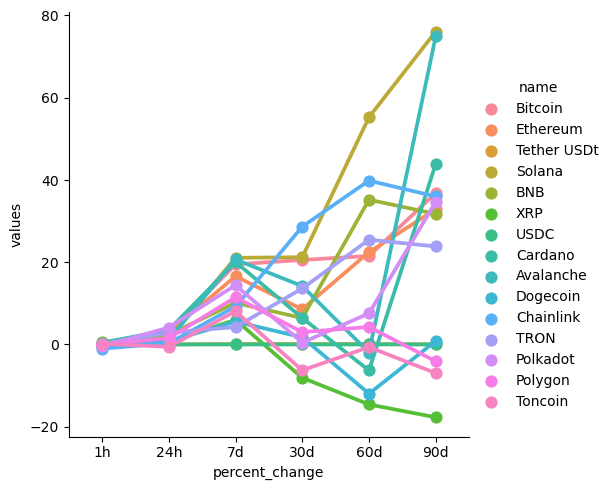

In [83]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [85]:
df10 = df[['name', 'quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,51252.41104,2024-02-14 14:49:24.919016
0,Bitcoin,51291.56811,2024-02-14 14:51:41.443047
0,Bitcoin,51321.31237,2024-02-14 14:52:42.587144
0,Bitcoin,51277.36073,2024-02-14 14:53:46.081637
0,Bitcoin,51277.43746,2024-02-14 14:54:47.224092
0,Bitcoin,51311.56972,2024-02-14 14:55:48.387911


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

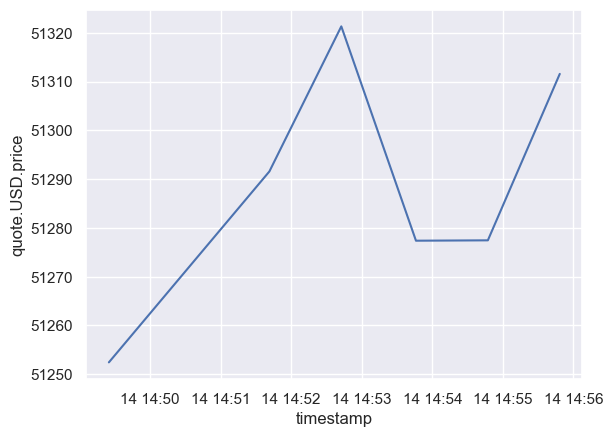

In [86]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)